# Plotting Simulation Results

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

import codes.plotting.sims as cplot
import codes.utils as cutil

sns.set(context="paper",style="white", font_scale=.65)

res_dir = cutil.HOME / "results" / "other"
out_dir = cutil.HOME / "results" / "figures" / "appendix" / "sims"
out_dir.mkdir(parents=True, exist_ok=True)

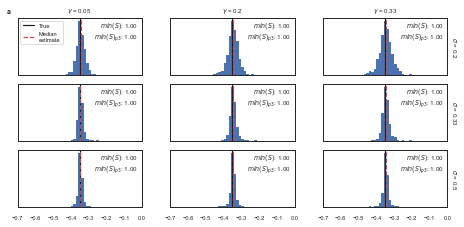

In [17]:
ds = xr.open_dataset(res_dir / f"seir_sim_estimates_pop_{int(1e9)}.nc")
g = cplot.facet_hist(ds, "I", "cum_effect", row="sigma", col="gamma", n_bins=50, sharey=False, figsize=(6.5,3.25), hist_kwargs={"edgecolor":"none"})
g.map(lambda: plt.yticks([]))
g.fig.suptitle("")
g.fig.text(.03, .97, "a", fontsize=7, fontweight='bold', va='top', ha='left')
for suffix in ["pdf", "png"]:
    g.fig.savefig(out_dir / f"cum_effect_highS_active_cases.{suffix}", dpi=300, tight_layout=True, bbox_inches="tight")

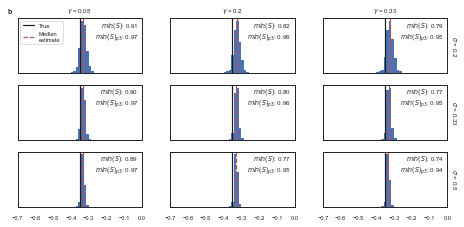

In [18]:
ds = xr.open_dataset(res_dir / f"seir_sim_estimates_pop_{int(1e5)}.nc")
g = cplot.facet_hist(ds, "IR", "cum_effect", row="sigma", col="gamma", n_bins=50, sharey=False, figsize=(6.5,3.25), hist_kwargs={"edgecolor":"none"})
g.map(lambda: plt.yticks([]))
g.fig.suptitle("")
g.fig.text(.03, .97, "b", fontsize=7, fontweight='bold', va='top', ha='left')
for suffix in ["pdf", "png"]:
    g.fig.savefig(out_dir / f"cum_effect_lowS_cum_cases.{suffix}", dpi=300, tight_layout=True, bbox_inches="tight")

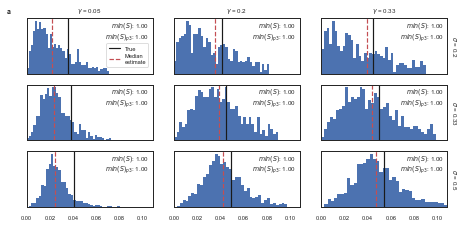

In [19]:
ds = xr.open_dataset(res_dir / f"seir_pred_estimates_pop_{int(1e9)}.nc")
diffs = ds[["true","I","S_min", "S_min_p3"]]

g = xr.plot.FacetGrid(diffs,col="gamma", row="sigma", sharex=True, sharey=False, figsize=(6.5,3.25))
g.map(lambda x, y: plt.hist(x, bins=np.linspace(0,y.mean().item()*2,40), edgecolor="none"), "I", "true")
g.map(lambda x: plt.axvline(x.mean().item(), label="True", color="k"), "true")
g.map(lambda x: plt.xlim(0,x.mean().item()*2), "true")
g.map(
    lambda x: plt.axvline(
        np.nanmedian(x), color="r", linestyle="--", label="Median\nestimate"
    ),
    "I",
)
g.map(
    lambda x, y: plt.text(
        0.97,
        0.97,
        f"$min(S)$: {x.min().item():.2f}\n$min(S)_{{p3}}$: {y.min().item():.2f}",
        horizontalalignment="right",
        verticalalignment="top",
        transform=plt.gca().transAxes,
    ),
    "S_min",
    "S_min_p3",
)
g.axes.flat[0].legend(loc="upper right", bbox_to_anchor=(.99, .6))
g.map(lambda: plt.yticks([]))
g.set_xlabels("")
g.set_ylabels("")
g.set_titles("$\{coord}$ = {value}")
g.fig.text(.03, .97, "a", fontsize=7, fontweight='bold', va='top', ha='left')
for suffix in ["pdf", "png"]:
    g.fig.savefig(out_dir / f"pred_averted_highS_active_cases.{suffix}", dpi=300, tight_layout=True, bbox_inches="tight")

/Users/ianbolliger/miniconda3/envs/gpl-covid/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ianbolliger/miniconda3/envs/gpl-covid/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


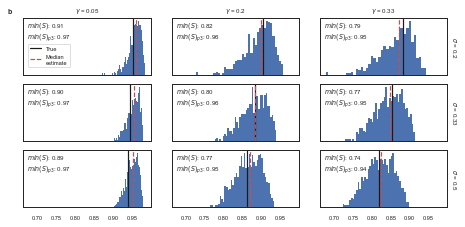

In [22]:
ds = xr.open_dataset(res_dir / f"seir_pred_estimates_pop_{int(1e5)}.nc")
diffs = ds[["true","IR","S_min", "S_min_p3"]]

g = xr.plot.FacetGrid(diffs,col="gamma", row="sigma", sharex=True, sharey=False, figsize=(6.5,3.25))
g.map(lambda x, y: plt.hist(x, bins=40, edgecolor="none"), "IR", "true")
g.map(lambda x: plt.axvline(x.mean().item(), label="True", color="k"), "true")
# g.map(lambda x: plt.xlim(0,1), "true")
g.map(
    lambda x: plt.axvline(
        np.nanmedian(x), color="r", linestyle="--", label="Median\nestimate"
    ),
    "IR",
)
g.map(
    lambda x, y: plt.text(
        0.03,
        0.97,
        f"$min(S)$: {x.min().item():.2f}\n$min(S)_{{p3}}$: {y.min().item():.2f}",
        horizontalalignment="left",
        verticalalignment="top",
        transform=plt.gca().transAxes,
    ),
    "S_min",
    "S_min_p3",
)
g.axes.flat[0].legend(loc="upper left", bbox_to_anchor=(.01, .6))
g.set_xlabels("")
g.set_ylabels("")
g.map(lambda: plt.yticks([]))
g.set_titles("$\{coord}$ = {value}")
g.fig.text(.03, .97, "b", fontsize=7, fontweight='bold', va='top', ha='left')
for suffix in ["pdf", "png"]:
    g.fig.savefig(out_dir / f"pred_averted_lowS_cum_cases.{suffix}", dpi=300, tight_layout=True, bbox_inches="tight")